# Cluster Analysis

Getting a deep understanding of how customers use your mobility service is crucial. As an example, for marketing purposes, or managerial decisions. One widely adopted approach to understand customers’ behavior is to find prevalent usage/trip clusters. 

**Tasks:** Based on the taxi trip patterns, can you identify clusters of trip types and/or customer types? How would you label these clusters? 

**Methods:** Identify clusters with soft-clustering and visualize your results. Compare your results to a hard-clustering method of your choice. You can use additional features like “distance to city center”, expressive hourly resolutions (e.g., “bar hours”, “morning commuting”), or even land-use/POI data. 

Furthermore, can you identify spatial hot spots for trip demand using Gaussian Mixture Models (i.e., using Spatial Kernel Density Estimation)?

## 0.1 Data Loading & Preparation

### 0.1.1 Importing Packages and Loading the Data

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import json
import datetime
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mlp
import matplotlib.pyplot as plt
#from geopy.distance import great_circle
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error
sns.set_theme()

import sklearn
from sklearn.cluster import KMeans
import folium

In [2]:
# import datasets
dfChicago = pd.read_csv("data\datasets\df_chicago.csv.zip")

In [3]:
dfChicago.columns

Index(['Trip_ID', 'Taxi_ID', 'Trip_Start_Timestamp', 'Trip_End_Timestamp',
       'Trip_Seconds', 'Trip_Miles', 'Pickup_Census_Tract',
       'Dropoff_Census_Tract', 'Pickup_Community_Area',
       'Dropoff_Community_Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Payment_Type', 'Pickup_Centroid_Latitude', 'Pickup_Centroid_Longitude',
       'Pickup_Centroid_Location', 'Dropoff_Centroid_Latitude',
       'Dropoff_Centroid_Longitude', 'Dropoff_Centroid__Location',
       'Community_Areas', 'Original_Trip_Start_Timestamp',
       'Original_Trip_End_Timestamp', 'date_start', 'dayOfWeek', 'isHoliday',
       'season', 'start_time_hourly', 'start_time_day', 'start_time_week',
       'start_time_month', 'isRushhour', 'velocity_(miles/h)', 'pressure',
       'datetime', 'humidity', 'temperature_celsius', 'wind_direction',
       'wind_speed', 'description', 'h3_hex_id_high_res',
       'h3_hex_id_medium_res', 'h3_hex_id_low_res'],
      dtype='object')

### 0.1.2 Additional Data Preparation

In [ ]:
# insert code here

## 1.1 Hard Clustering

### 1.1.1 Feature Selection

In [4]:
dfChicago_clu_1 = dfChicago[['start_time_hourly','Trip_Seconds',"Trip_Miles"]]
dfChicago_clu_1

,start_time_hourly,Trip_Seconds,Trip_Miles
0,0,900.0,2.7
1,0,240.0,0.4
2,0,1920.0,0.6
3,0,180.0,1.0
4,0,240.0,0.3
...,...,...,...
8974515,23,540.0,1.4
8974516,23,1860.0,5.9
8974517,23,720.0,2.0
8974518,23,660.0,3.5


In [5]:
# method for scaling the data 
def scaling_data(df1):
    
    scaler = StandardScaler()
    dfChicago_clu_X_locations_scaled = scaler.fit_transform(df1)
    dfChicago_clu_X_locations_scaled_df = pd.DataFrame(dfChicago_clu_X_locations_scaled, columns=df1.columns, 
                                            index=df1.index)
    
    return dfChicago_clu_X_locations_scaled_df



In [6]:
dfChicago_clu_1_scaled = scaling_data(dfChicago_clu_1)

### 1.1.2 Model Initialization & Validation of Number of Clusters

In [7]:
def get_clusters_and_losses(input_data):
    
    clusters_dfChicago_clu_X = []
    losses_dfChicago_clu_X = []

    for k in range(20):
        model_clu_X = KMeans(n_clusters=k+1,n_init=1)
        model_clu_X.fit(input_data)
        clusters_dfChicago_clu_X.append(k+1)
        losses_dfChicago_clu_X.append(model_clu_X.inertia_)
        
    return clusters_dfChicago_clu_X, losses_dfChicago_clu_X

In [8]:
# method to plot the most valuable number of clusters
def plot_best_fitting_number_of_clusters(input_data, title_info):
    
    fig = plt.figure(figsize=(16,8))

    plt.subplot(1, 2, 1)

    clusters, losses = get_clusters_and_losses(input_data)

    plt.plot(clusters, losses)
    plt.ylabel("Loss")
    plt.xlabel("Number of clusters")
    plt.title(f"Number of Clusters {title_info}")

    plt.subplot(1, 2, 2)

    plt.plot(clusters, losses)
    plt.ylabel("Loss")
    plt.xlabel("Number of clusters")
    plt.xlim([0,12])
    plt.title(f"Number of Clusters {title_info} - Deeper Look")

    plt.show()

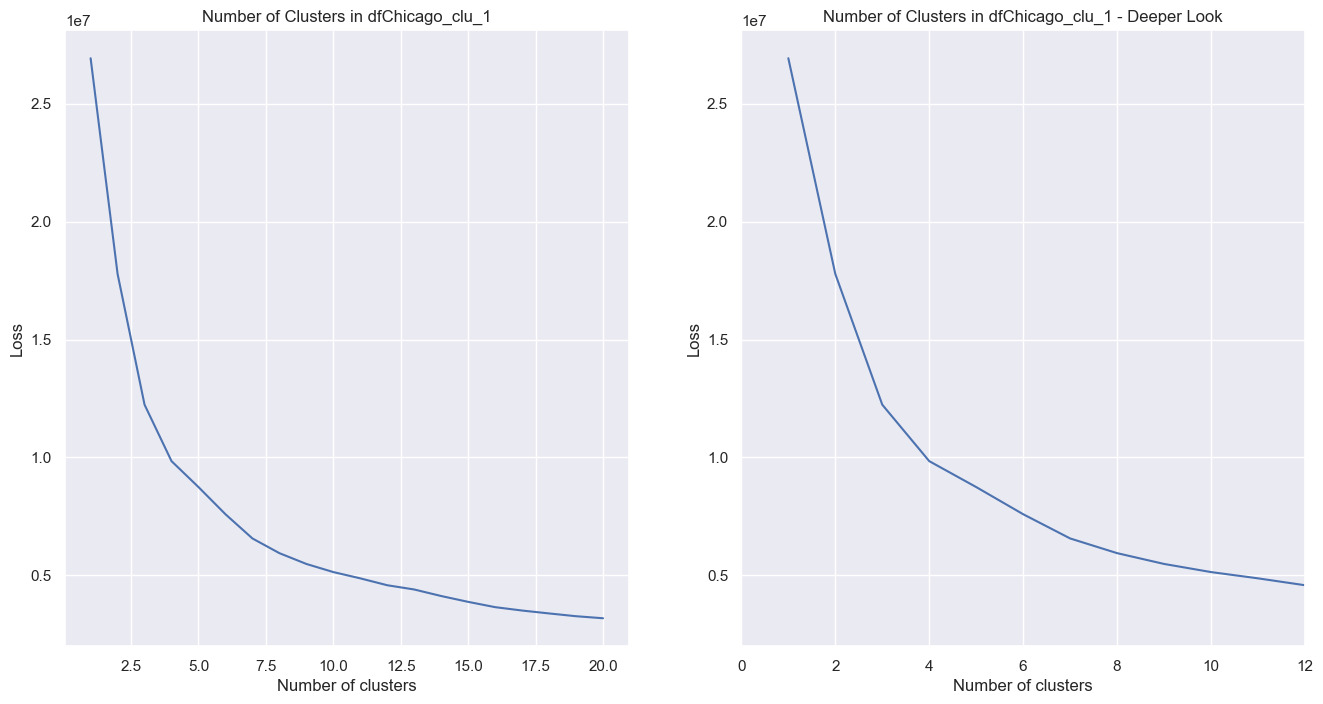

In [9]:
plot_best_fitting_number_of_clusters(dfChicago_clu_1_scaled, "in dfChicago_clu_1")

### 1.1.3 Computing Clusters with KMeans

In [15]:
# initializing our kmeans algorithm 
kmean = KMeans(n_clusters=6,init='k-means++', random_state=42)

# fitting our scaled data to the model
kmean.fit(dfChicago_clu_1_scaled)

c:\Users\jonas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [16]:
# store the predicted clusters 
Clusters = kmean.predict(dfChicago_clu_1_scaled)

In [17]:
# creating a column for the calculated clusters

dfChicago_clu_1.loc[:, 'cluster_number'] = Clusters
dfChicago_clu_1

,start_time_hourly,Trip_Seconds,Trip_Miles,cluster_number
0,0,900.0,2.7,2
1,0,240.0,0.4,2
2,0,1920.0,0.6,1
3,0,180.0,1.0,2
4,0,240.0,0.3,2
...,...,...,...,...
8974515,23,540.0,1.4,0
8974516,23,1860.0,5.9,4
8974517,23,720.0,2.0,0
8974518,23,660.0,3.5,5


### 1.1.4 Analyzing Clusters & Labeling them

In [18]:
def plot_information_about_clusters(df, feature_list, cluster_column):
    
    fig = plt.figure(figsize=(14, 18))
    
    for i in range(1, len(feature_list)+1):
        plt.subplot(np.floor(len(feature_list)/2).astype(int)+1, 2, i)
        sns.boxplot(y=df[feature_list[i-1]], 
                    x = df[cluster_column], 
                    palette="bright",
                    showmeans=True,
                    meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}).set_title("Cluster - " + feature_list[i-1]).set_fontsize('18')
        plt.tight_layout()
    
    plt.subplot(np.floor(len(feature_list)/2).astype(int)+1, 2, len(feature_list)+1)
    ax = sns.countplot(x=cluster_column, data=df, palette="bright")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Amount")
    ax.set_title('Cluster - Amount',fontsize=18)
    fig.tight_layout()

    for container in ax.containers:
        ax.bar_label(container)

In [19]:
dfChicago_clu_1[dfChicago_clu_1['cluster_number']==0]['cluster_number'].count()

2687313

In [20]:
def get_quantiles_of_clusters(df, n_cluster, cluster_feature):
    
    # create dataframe to store values of calculated quantiles and return df at the end of the method
    dfChicago_quantiles = pd.DataFrame(df)
    # empty all values inside newly created df to just receive columns
    dfChicago_quantiles = dfChicago_quantiles[0:0]

    for cluster in range(0,n_cluster):
        # get 0.25 quantiles
        dict_quantiles_0_25 = df[df[cluster_feature]==cluster].quantile(q=0.25).to_dict()
        # get 0.75 quantiles
        dict_quantiles_0_75 = df[df[cluster_feature]==cluster].quantile(q=0.75).to_dict()
        # round all entries in dictionaries to one decimal place
        dfQuantiles_0_25 = pd.DataFrame(dict_quantiles_0_25, index=[0]).round(2)
        dfQuantiles_0_75 = pd.DataFrame(dict_quantiles_0_75, index=[0]).round(2)
        # parse all values in newly created dfs to strings
        dfQuantiles_0_25 = dfQuantiles_0_25.astype(str)
        dfQuantiles_0_75 = dfQuantiles_0_75.astype(str)
        # combine both quantile dataframes into one interval dataframe
        dfQuantiles_interval = dfQuantiles_0_25 + " - " + dfQuantiles_0_75
        dfQuantiles_interval['Amount Trips in Cluster'] = df[df[cluster_feature]==cluster][cluster_feature].count().astype(int)
        dfQuantiles_interval['Percentage'] = (df[df[cluster_feature]==cluster][cluster_feature].count()/len(df)).round(4)*100
        # concatenate the quantiles row after row
        dfChicago_quantiles = pd.concat([dfChicago_quantiles, dfQuantiles_interval.loc[dfQuantiles_interval.index.values == 0]])
        
    # lastly styling the output dataframe (dropping unnecessary column, resetting the index, giving "Cluster" as index column name)
    dfChicago_quantiles.drop(columns=[cluster_feature], inplace=True)
    dfChicago_quantiles.reset_index(drop=True, inplace=True)
    dfChicago_quantiles = dfChicago_quantiles.rename_axis('Cluster')    
    
    return dfChicago_quantiles

C:\Users\jonas\AppData\Local\Temp\ipykernel_22980\1267026547.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jonas\AppData\Local\Temp\ipykernel_22980\1267026547.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jonas\AppData\Local\Temp\ipykernel_22980\1267026547.py:21: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


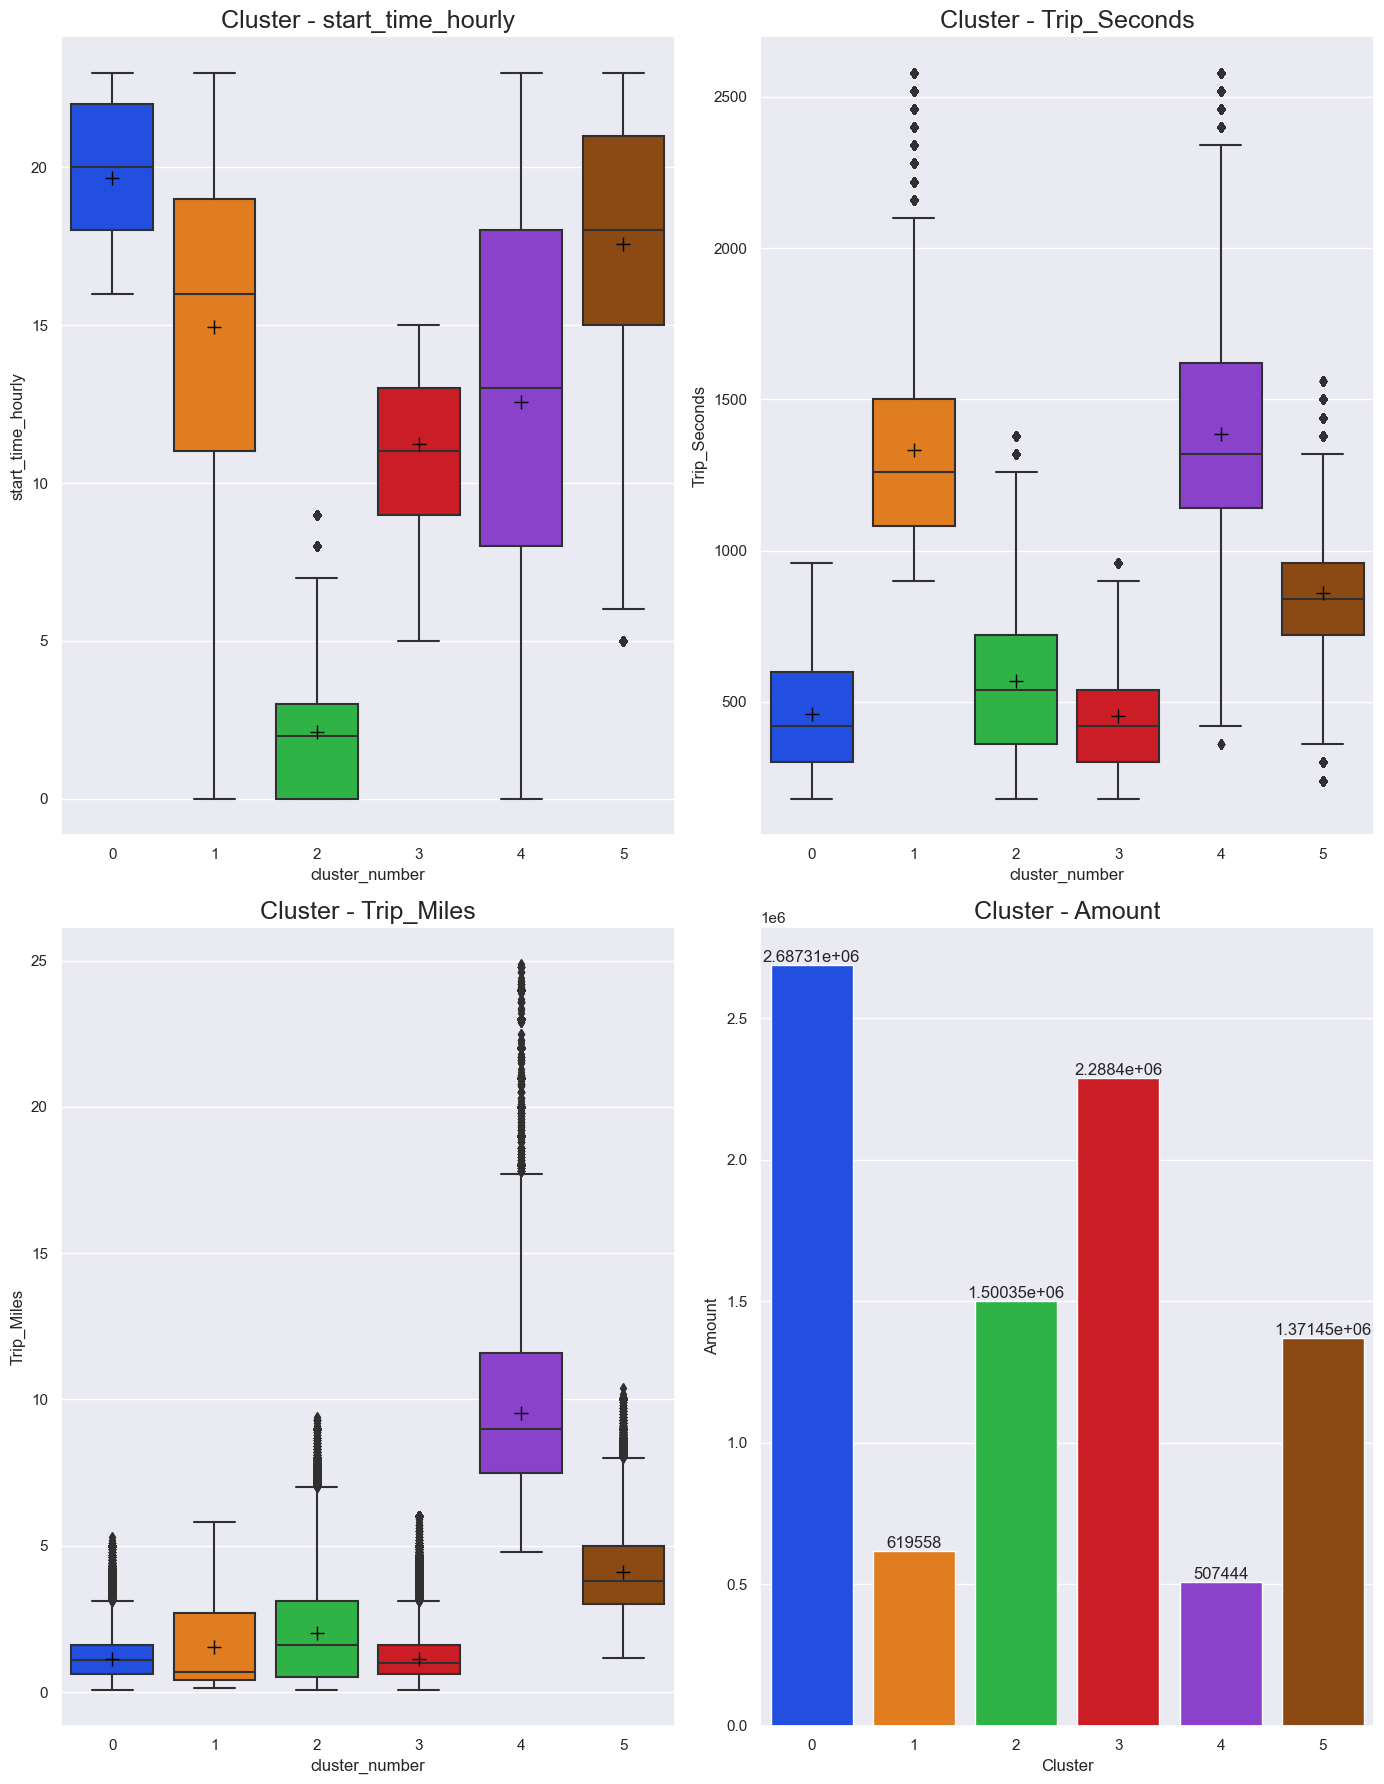

In [21]:
plot_information_about_clusters(dfChicago_clu_1, ['start_time_hourly','Trip_Seconds',"Trip_Miles"], 'cluster_number')

In [23]:
dfChicago_clu_1_quantiles = get_quantiles_of_clusters(dfChicago_clu_1, 6, 'cluster_number')
dfChicago_clu_1_quantiles.sort_values(by=['start_time_hourly', 'Trip_Seconds'], ascending=False)

,start_time_hourly,Trip_Seconds,Trip_Miles,Amount Trips in Cluster,Percentage
Cluster,,,,,
3,9.0 - 13.0,300.0 - 540.0,0.6 - 1.6,2288404.0,25.50
4,8.0 - 18.0,1140.0 - 1620.0,7.5 - 11.6,507444.0,5.65
0,18.0 - 22.0,300.0 - 600.0,0.6 - 1.6,2687313.0,29.94
5,15.0 - 21.0,720.0 - 960.0,3.0 - 5.0,1371452.0,15.28
1,11.0 - 19.0,1080.0 - 1500.0,0.4 - 2.7,619558.0,6.90
2,0.0 - 3.0,360.0 - 720.0,0.5 - 3.1,1500349.0,16.72


In [24]:
label_names = {'0': "Evening short trips", 
               '1': "Day Trips long time short distance",
               '2': "Party People",
               '3': "Morning trips",
               '4': "Day Trips long time long distance",
               '5': "Evening Trips"}

# integrating our labeled clusters in the dataframe
dfChicago_clu_1['Cluster Labels'] = dfChicago_clu_1['cluster_number'].astype(str)
dfPhiladedfChicago_clu_1lphia_clu_1 = dfChicago_clu_1.replace({"Cluster Labels": label_names})



C:\Users\jonas\AppData\Local\Temp\ipykernel_22980\1705735301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChicago_clu_1['Cluster Labels'] = dfChicago_clu_1['cluster_number'].astype(str)
